In [4]:
# Import data
import networkx as nx
#Flight data taken from https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master/datasets/openflights 
G = nx.read_edgelist('data/openflights_usa.edges')

In [5]:
# Basic statistics
print('Nodes in G:', G.number_of_nodes())
print('Edges in G:', G.number_of_edges())
print('Is G connected?', nx.is_connected(G))
print('Number of connected components in G:', nx.number_connected_components(G))
print('What is the size of the giant component?', len(max(nx.connected_components(G), key=len)))

Nodes in G: 546
Edges in G: 2781
Is G connected? False
Number of connected components in G: 3
What is the size of the giant component? 539


In [6]:
# Calculate degree, close and betweenness centrality for all nodes, and store the results in a pandas DataFrame
import pandas as pd
import airportsdata

df = pd.DataFrame({'degree': nx.degree_centrality(G),'closeness': nx.closeness_centrality(G), 'betweenness': nx.betweenness_centrality(G)})

# Adds the name and city of each airport to the DataFrame
airports = pd.DataFrame(airportsdata.load('IATA')).T
df = df.join(airports[['name', 'city']])
df

,degree,closeness,betweenness,name,city
RDD,0.001835,0.299374,0.000000,Redding Municipal Airport,Redding
SFO,0.130275,0.429337,0.025286,San Francisco International Airport,San Francisco
EUG,0.016514,0.356676,0.000154,Mahlon Sweet Field,Eugene
SLC,0.155963,0.467098,0.056644,Salt Lake City International Airport,Salt Lake City
AZA,0.058716,0.338489,0.005401,Phoenix-Mesa Gateway Airport,Phoenix
...,...,...,...,...,...
SHX,0.001835,0.234167,0.000000,Shageluk Airport,Shageluk
SDY,0.001835,0.263830,0.000000,Sidney-Richland Regional Airport,Sidney
GDV,0.001835,0.263830,0.000000,Dawson Community Airport,Glendive
OLF,0.001835,0.263830,0.000000,NaN,NaN


In [7]:
df.sort_values(by='degree', ascending=False)[['name', 'city','degree']].head(3)

,name,city,degree
ATL,Hartsfield - Jackson Atlanta International Air...,Atlanta,0.280734
ORD,Chicago O'Hare International Airport,Chicago,0.273394
DEN,Denver International Airport,Denver,0.271560


In [8]:
df.sort_values(by='closeness', ascending=False)[['name', 'city','closeness']].head(3)

,name,city,closeness
DEN,Denver International Airport,Denver,0.503880
ORD,Chicago O'Hare International Airport,Chicago,0.501975
MSP,Minneapolis-St Paul International/Wold-Chamber...,Minneapolis,0.487238


In [9]:
df.sort_values(by='betweenness', ascending=False)[['name', 'city','betweenness']].head(3)

,name,city,betweenness
ANC,Ted Stevens Anchorage International Airport,Anchorage,0.318991
DEN,Denver International Airport,Denver,0.150853
ORD,Chicago O'Hare International Airport,Chicago,0.126094


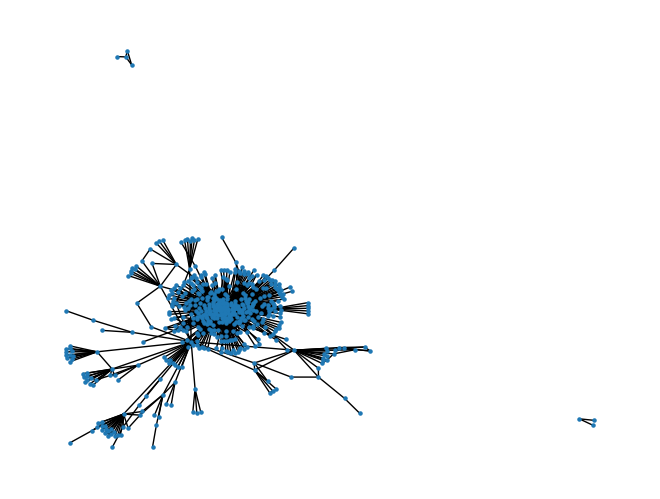

In [10]:
#draw the giant component of the graph
nx.draw(G, node_size=5)

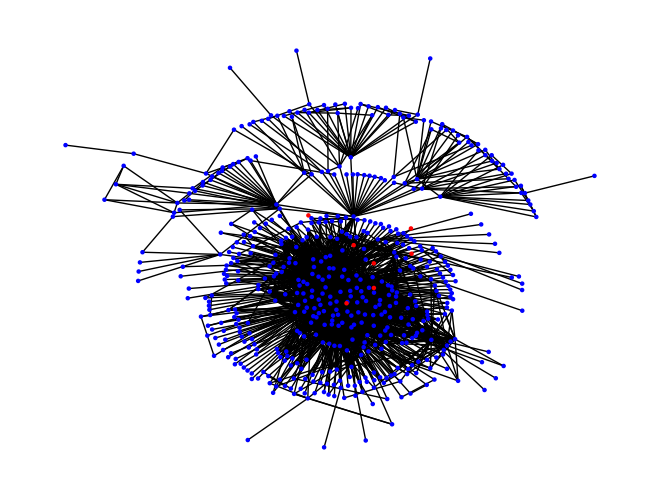

In [11]:
#draw with the kamada_kawai layout, painting the nodes not in the giant component red
nx.draw_kamada_kawai(G, node_size=5, node_color=['red' if node not in max(nx.connected_components(G), key=len) else 'blue' for node in G.nodes()])

In [12]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go

# Compute the node degrees and create a list of node sizes proportional to log(degree)
degree = dict(G.degree)
node_sizes = [10*np.log10(degree[node]+1) for node in G.nodes]

# Create a list of node labels
labels = [f'{i}: K = {degree[i]}' for i in G.nodes]

# Get node positions
pos = nx.kamada_kawai_layout(G)

# Create edge trace
edge_trace = go.Scatter(x=[], y=[], line=dict(width=1, color='#888'), hoverinfo='none', mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] = tuple(list(edge_trace['x']) + [x0, x1, None])
    edge_trace['y'] = tuple(list(edge_trace['y']) + [y0, y1, None])

# Create node trace
node_trace = go.Scatter(x=[], y=[], text=[], mode='markers+text', hoverinfo='text', hovertext=labels, marker=dict(showscale=False, colorscale='YlGnBu', reversescale=True, size=node_sizes, color=node_sizes, line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] = tuple(list(node_trace['x']) + [x])
    node_trace['y'] = tuple(list(node_trace['y']) + [y])

# Create the plot
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(title='OpenFlights US Network',
                              xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                              yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),legend=dict(x=0.05, y=0.95, bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='rgba(0, 0, 0, 0.5)', borderwidth=1)))


# Show the plot. This can be redone in a new cell without recalculating everything else
fig.update_layout(dict(width=900, height=600, autosize=False), margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [13]:
# Computes the the fraction of nodes/edges in the k-core
kcore = nx.k_core(G)

k_core_nodes = kcore.number_of_nodes()
k_core_edges = kcore.number_of_edges()
k_core_nodes_fraction = k_core_nodes/G.number_of_nodes()
k_core_edges_fraction = k_core_edges/G.number_of_edges()

print('{:d} nodes in the k-core ({:0.2f}% of the nodes)'.format(k_core_nodes, 100*k_core_nodes_fraction))
print('{:d} edges in the k-core ({:0.2f}% of the edges)'.format(k_core_edges, 100*k_core_edges_fraction))

36 nodes in the k-core (6.59% of the nodes)
580 edges in the k-core (20.86% of the edges)


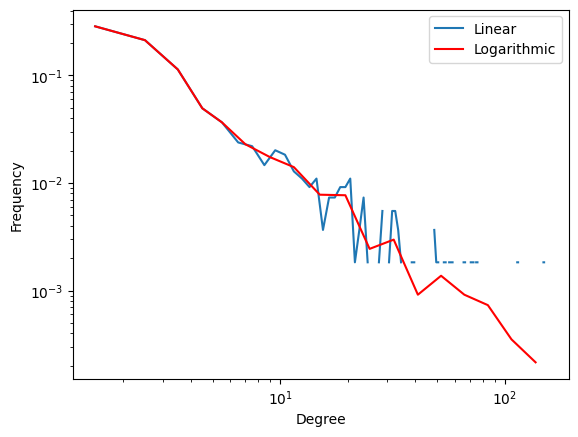

In [14]:
# Computes the degree distribution of the network
import powerlaw

degree_dist = [G.degree[node] for node in G.nodes]

fig = plt.figure()
powerlaw.plot_pdf(degree_dist, linear_bins=True, **{'label': 'Linear'})
powerlaw.plot_pdf(degree_dist, linear_bins=False, color='r', **{'label': 'Logarithmic'})
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency');

In [15]:
# Gets the knn of each node
knn = nx.average_neighbor_degree(G)
np.mean(list(knn.values()))

64.04614431282477

In [16]:
# Computes the average degree of the neighbors of a node
def avg_degree_neighbors(G , friend):
    if G.degree(friend) > 0:
        k_nn = 0
        for node in G.neighbors(friend):
            k_nn += G.degree(node)/G.degree(friend)
        return k_nn
    else:
        print('The k_nn of ',friend ,'is undefined because ',friend,'has no neighbors !')

In [17]:
knn_avg = 0
for node in G.nodes():
    knn_avg += avg_degree_neighbors(G,node)
knn_avg = knn_avg/G.number_of_nodes()

print('Average k_nn:', knn_avg)
print('Average degree:', 2*G.number_of_edges()/G.number_of_nodes())

Average k_nn: 64.04614431282478
Average degree: 10.186813186813186
